In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [55]:
# Loading dataset
df = pd.read_csv(r"C:\Users\jilow\OneDrive\Documents\data\sierraleone-bumbuna.csv")

Data profiling

In [56]:
# Dataset overview: Shape and info
print(f"Shape of dataset: {df.shape}")
print("Columns:", df.columns.tolist())
df.info()# Summary of data types and non-null counts
df.head()

Shape of dataset: (525600, 19)
Columns: ['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS', 'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation', 'TModA', 'TModB', 'Comments']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-30 00:01,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
1,2021-10-30 00:02,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
2,2021-10-30 00:03,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
3,2021-10-30 00:04,-0.7,0.0,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.1,22.3,22.6,NaN
4,2021-10-30 00:05,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN


In [57]:
# Descriptive statistics (numeric)
display(df.describe())

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,201.957515,116.376337,113.720571,206.643095,198.114691,26.319394,79.448857,1.146113,1.691606,0.363823,133.044668,7.172220,999.876469,0.000967,0.004806,32.504263,32.593091,NaN
std,298.495150,218.652659,158.946032,300.896893,288.889073,4.398605,20.520775,1.239248,1.617053,0.295000,114.284792,7.535093,2.104419,0.031074,0.047556,12.434899,12.009161,NaN
min,-19.500000,-7.800000,-17.900000,0.000000,0.000000,12.300000,9.900000,0.000000,0.000000,0.000000,0.000000,0.000000,993.000000,0.000000,0.000000,10.700000,11.100000,NaN
25%,-2.800000,-0.300000,-3.800000,0.000000,0.000000,23.100000,68.700000,0.000000,0.000000,0.000000,0.000000,0.000000,999.000000,0.000000,0.000000,23.500000,23.800000,NaN
50%,0.300000,-0.100000,-0.100000,3.600000,3.400000,25.300000,85.400000,0.800000,1.600000,0.400000,161.500000,6.200000,1000.000000,0.000000,0.000000,26.600000,26.900000,NaN
75%,362.400000,107.000000,224.700000,359.500000,345.400000,29.400000,96.700000,2.000000,2.600000,0.600000,234.100000,12.000000,1001.000000,0.000000,0.000000,40.900000,41.300000,NaN
max,1499.000000,946.000000,892.000000,1507.000000,1473.000000,39.900000,100.000000,19.200000,23.900000,4.100000,360.000000,98.400000,1006.000000,1.000000,2.400000,72.800000,70.400000,NaN


In [58]:
# Missing‐value report
miss = df.isna().sum()
display(miss[miss > 0])

Comments    525600
dtype: int64

In [59]:
# Flag columns with >5% missing values
total = len(df)
for col, n in miss.items():
    if n/total > 0.05:
        print(f"⚠️ {col}: {n} missing ({n/total:.1%})")


⚠️ Comments: 525600 missing (100.0%)


Data Cleaning

In [60]:
import numpy as np
from scipy.stats import zscore

# Convert Timestamp to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%Y-%m-%d %H:%M')

In [61]:
# Drop totally empty or irrelevant columns
if 'Comments' in df.columns:
    df.drop(columns=['Comments'], inplace=True)

In [62]:
# Outlier detection via Z‐score on critical columns
cols = ['GHI','DNI','DHI','ModA','ModB','WS','WSgust']
zs = df[cols].apply(zscore, nan_policy='omit')
outlier_mask = (np.abs(zs) > 3).any(axis=1)
print("Outliers flagged:", outlier_mask.sum())

Outliers flagged: 16292


In [63]:
# Remove outliers
df_clean = df.loc[~outlier_mask].copy()

In [64]:
# Impute remaining missing numeric values with median
for c in cols:
    med = df_clean[c].median()
    df_clean[c] = df_clean[c].fillna(med)

In [65]:
# Final check: no missing & reasonable shape
print("After cleaning shape:", df_clean.shape)
display(df_clean.isna().sum()[df_clean.isna().sum() > 0])

After cleaning shape: (509308, 18)


Series([], dtype: int64)

EDA

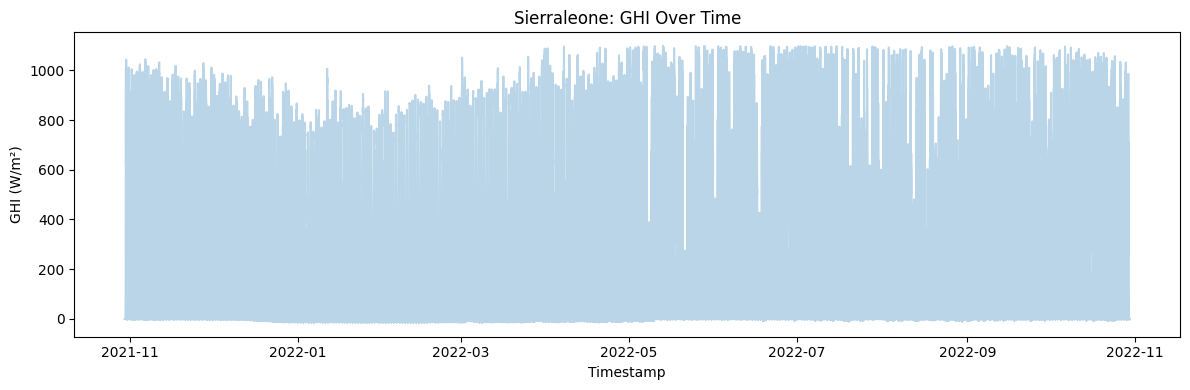

In [66]:
# Time series plot
plt.figure(figsize=(12,4))
plt.plot(df_clean['Timestamp'], df_clean['GHI'], alpha=0.3)
plt.title('Sierraleone: GHI Over Time')
plt.xlabel('Timestamp')
plt.ylabel('GHI (W/m²)')
plt.tight_layout()
plt.show()


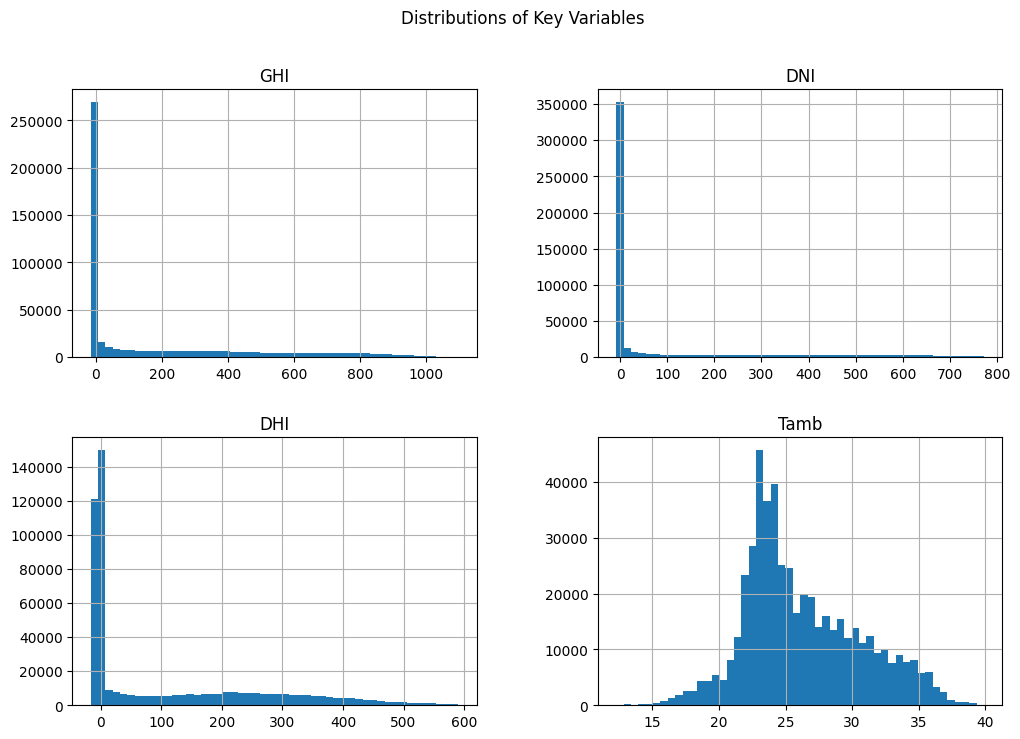

In [67]:
# Histogram & Distribution
df_clean[['GHI','DNI','DHI','Tamb']].hist(bins=50, figsize=(12,8))
plt.suptitle('Distributions of Key Variables')
plt.show()

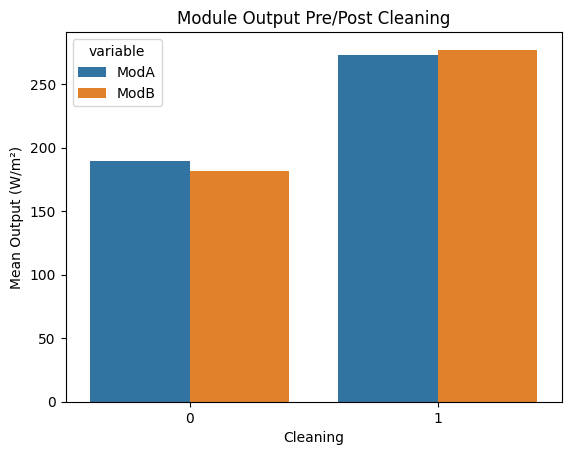

In [68]:
#cleaning impact on module output
cleaning_means = df_clean.groupby('Cleaning')[['ModA','ModB']].mean().reset_index()
sns.barplot(data=cleaning_means.melt(id_vars='Cleaning'),
            x='Cleaning', y='value', hue='variable')
plt.title('Module Output Pre/Post Cleaning')
plt.ylabel('Mean Output (W/m²)')
plt.show()


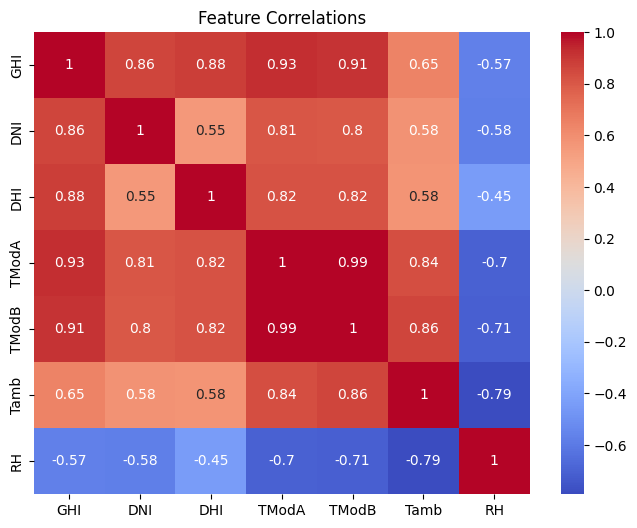

In [69]:
# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df_clean[['GHI','DNI','DHI','TModA','TModB','Tamb','RH']].corr(),
            annot=True, cmap='coolwarm')
plt.title('Feature Correlations')
plt.show()

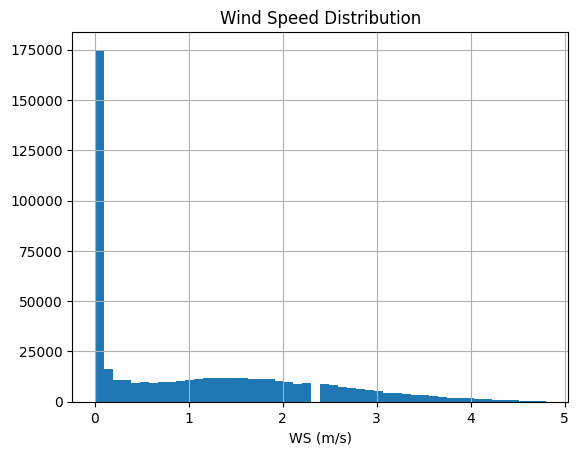

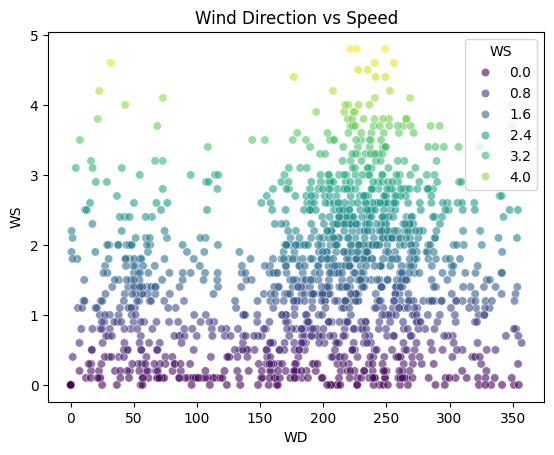

In [70]:
# Wind & Direction analysis
# Wind speed distribution
df_clean['WS'].hist(bins=50)
plt.title('Wind Speed Distribution')
plt.xlabel('WS (m/s)')
plt.show()
# Simple wind‐rose style scatter
sns.scatterplot(data=df_clean.sample(2000),
                x='WD', y='WS', hue='WS', palette='viridis', alpha=0.6)
plt.title('Wind Direction vs Speed')
plt.show()

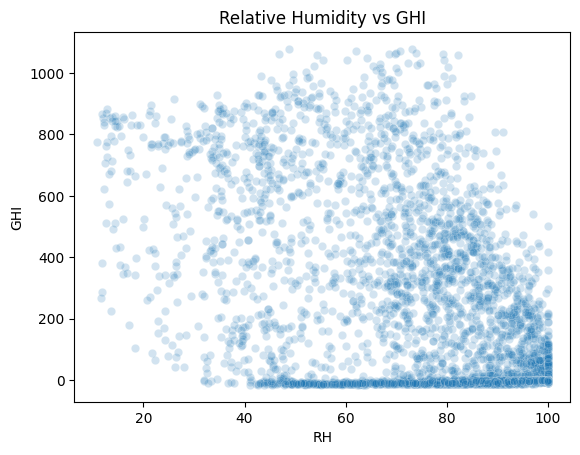

In [71]:
# Scatter relation
sns.scatterplot(data=df_clean.sample(5000), x='RH', y='GHI', alpha=0.2)
plt.title('Relative Humidity vs GHI')
plt.show()

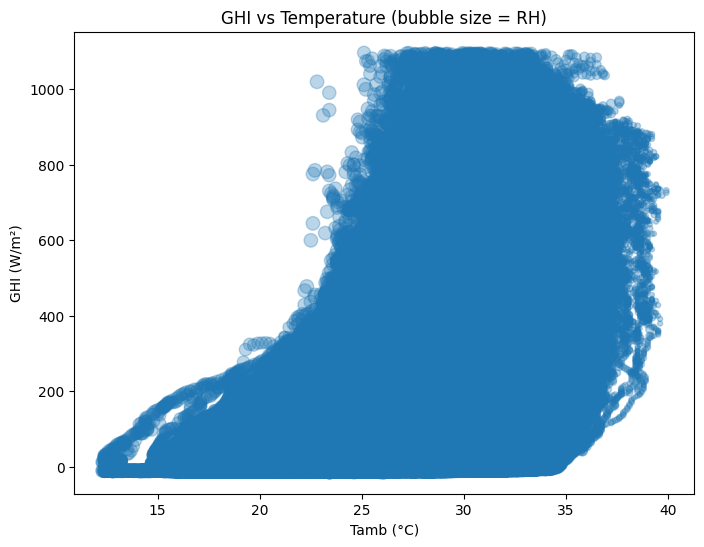

In [72]:
# Bubble chart: Temperature and humidity
plt.figure(figsize=(8,6))
plt.scatter(df_clean['Tamb'], df_clean['GHI'],
            s=df_clean['RH'], alpha=0.3)
plt.title('GHI vs Temperature (bubble size = RH)')
plt.xlabel('Tamb (°C)')
plt.ylabel('GHI (W/m²)')
plt.show()


In [73]:
# After cleaning the data (df_clean):
import os
import pandas as pd

# Create directory if missing
os.makedirs("data", exist_ok=True)

# Export cleaned data for Benin
df_clean.to_csv("data/Sierraleone_clean.csv", index=False)